# Gaussian Naive Bayes classifier VS Gaussian Bayes classifier

## Helper function

Run the following snippets first

In [0]:
!pip install pomegranate

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from pomegranate import BayesClassifier, MultivariateGaussianDistribution
from sklearn.svm import SVC

In [0]:
def plot_training_data(X, y, xlim, ylim = None):
    if ylim is None:
      ylim = xlim
    plt.scatter(X[y == 0][:,0],X[y == 0][:,1], color='b', alpha=0.3, label='Class 0')
    plt.scatter(X[y == 1][:,0],X[y == 1][:,1], color='r', alpha=0.3, label='Class 1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Training data')

    if xlim == ylim:
        plt.axis('square')
    plt.xlim(xlim)
    plt.ylim(ylim)

    legend = plt.legend(loc='upper right', shadow=True, frameon=True)
    legend.get_frame().set_facecolor('1')

def plot_decision_boundary(X, y, pred_func, xlim, ylim = None):
    # Ref: https://gist.github.com/dennybritz/ff8e7c2954dd47a4ce5f
    # Set min and max values
    if ylim is None:
      ylim = xlim
    x_min, x_max = xlim
    y_min, y_max = ylim

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101), np.linspace(ylim[0], ylim[1], 101))

    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('bwr'), alpha = 0.8)
    plt.contourf(xx, yy, Z, cmap=plt.get_cmap('bwr'), alpha = 0.3)
    plt.xlabel('x1')
    plt.ylabel('x2')

    if xlim == ylim:
        plt.axis('square')
    plt.xlim(xlim)
    plt.ylim(ylim)




---


## Naive Bayes classifier VS Bayes classifier

Naive Bayes classifier is based on assumption of independent variables, so it will work well with data from independent variables

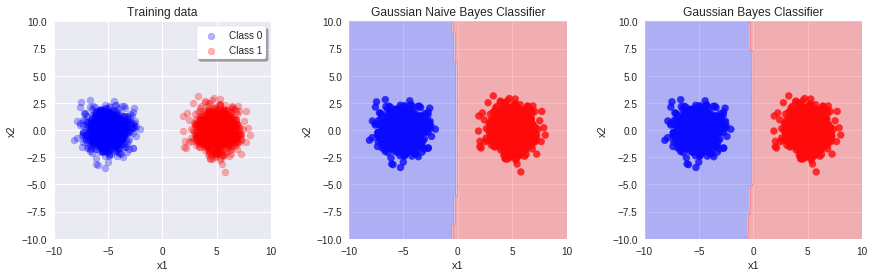

In [4]:
ax_lim = (-10,10)
plt.figure(figsize=(15,4))

# =============== X training ===============
N = 1000
X0 = np.random.normal(loc=(-5,0), scale=1, size=(N,2))
X1 = np.random.normal(loc=(5,0), scale=1, size=(N,2))

X = np.concatenate((X0,X1))
y = np.concatenate((np.zeros(len(X0)),np.ones(len(X1))))

plt.subplot(131)
plot_training_data(X, y, ax_lim)

# =============== Classifier ===============
# --------------- Gaussian Naive Bayes Classifier ---------------
model = GaussianNB()
model.fit(X, y)

plt.subplot(132)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Naive Bayes Classifier')

# --------------- Gaussian Bayes Classifier ---------------
model = BayesClassifier.from_samples(MultivariateGaussianDistribution, X, y)

plt.subplot(133)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Bayes Classifier')

plt.show()

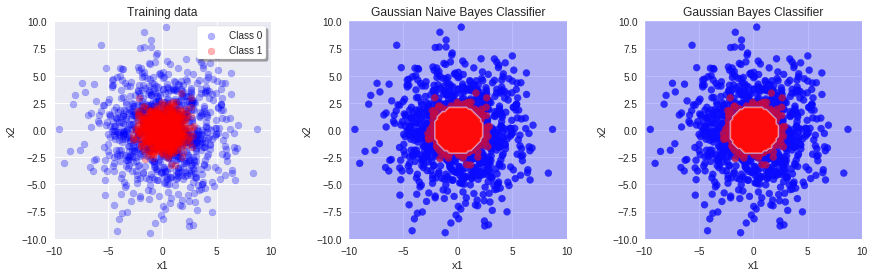

In [5]:
ax_lim = (-10,10)
plt.figure(figsize=(15,4))

# =============== X training ===============
N = 1000
X0 = np.random.normal(scale=3, size=(N,2))
X1 = np.random.normal(scale=1, size=(N,2))

X = np.concatenate((X0,X1))
y = np.concatenate((np.zeros(len(X0)),np.ones(len(X1))))

plt.subplot(131)
plot_training_data(X, y, ax_lim)

# =============== Classifier ===============
# --------------- Gaussian Naive Bayes Classifier ---------------
model = GaussianNB()
model.fit(X, y)

plt.subplot(132)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Naive Bayes Classifier')

# --------------- Gaussian Bayes Classifier ---------------
model = BayesClassifier.from_samples(MultivariateGaussianDistribution, X, y)

plt.subplot(133)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Bayes Classifier')

plt.show()

However Naive Bayes classifier cannot classify two set of data having the same mean and variance but dependent because it is based on assumption of independent variables. So Bayes classifier works better on this issue.

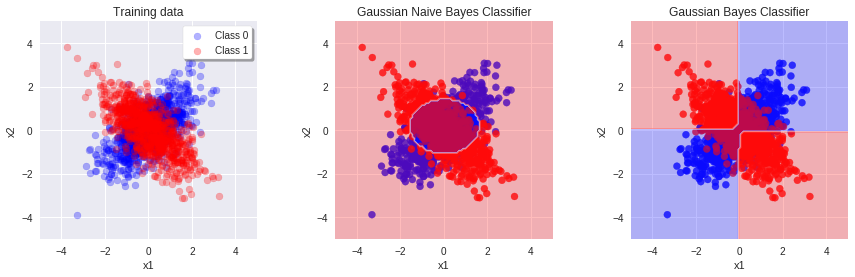

In [6]:
import numpy as np
import matplotlib.pyplot as plt

ax_lim = (-5,5)
plt.figure(figsize=(15,4))

# =============== X training ===============
N = 1000
a = 0.7
mean = (0,0)
cov1 = [[1,a],[a,1]]
cov2 = [[1,-a],[-a,1]]
X0 = np.random.multivariate_normal(mean, cov1, N)
X1 = np.random.multivariate_normal(mean, cov2, N)

X = np.concatenate((X0,X1))
y = np.concatenate((np.zeros(len(X0)),np.ones(len(X1))))

plt.subplot(131)
plot_training_data(X, y, ax_lim)

# =============== Classifier ===============
# --------------- Gaussian Naive Bayes Classifier ---------------
model = GaussianNB()
model.fit(X, y)

plt.subplot(132)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Naive Bayes Classifier')

# --------------- Gaussian Bayes Classifier ---------------
model = BayesClassifier.from_samples(MultivariateGaussianDistribution, X, y)

plt.subplot(133)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Bayes Classifier')

plt.show()



---


## Problem with Naive Bayes and Bayes classifiers

In our case, we use Naive Bayes and Bayes classifiers on Gaussian assumption. By the nature of Gaussian, it has only one peak. As a result, sometime they cannot classify well on the data not grouping together in each class.

It still work if there is one class grouping together.

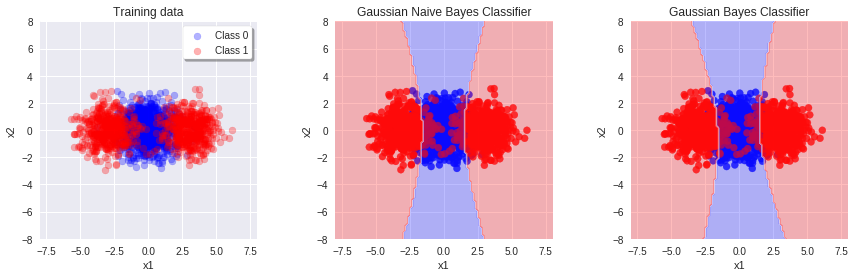

In [10]:
N = 1000
ax_lim = (-8,8)
X0 = (np.random.normal(size=(N,2)))
X1 = np.concatenate((np.random.normal(loc=(-3,0), size=(int(N/2),2)), np.random.normal(loc=(3,0), size=(int(N/2),2))))

X = np.concatenate((X0,X1))
y = np.concatenate((np.zeros(len(X0)),np.ones(len(X1))))

# =============== X training ===============
plt.figure(figsize=(15,4))
plt.subplot(131)
plot_training_data(X, y, ax_lim)

# =============== Classifier ===============
# --------------- Gaussian Naive Bayes Classifier ---------------
model = GaussianNB()
model.fit(X, y)

plt.subplot(132)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Naive Bayes Classifier')

# --------------- Gaussian Bayes Classifier ---------------
model = BayesClassifier.from_samples(MultivariateGaussianDistribution, X, y)

plt.subplot(133)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Bayes Classifier')

plt.show()

But if each class has two data groups, it does not work. So other classifiers should be applied.

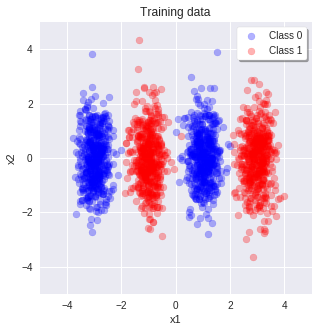

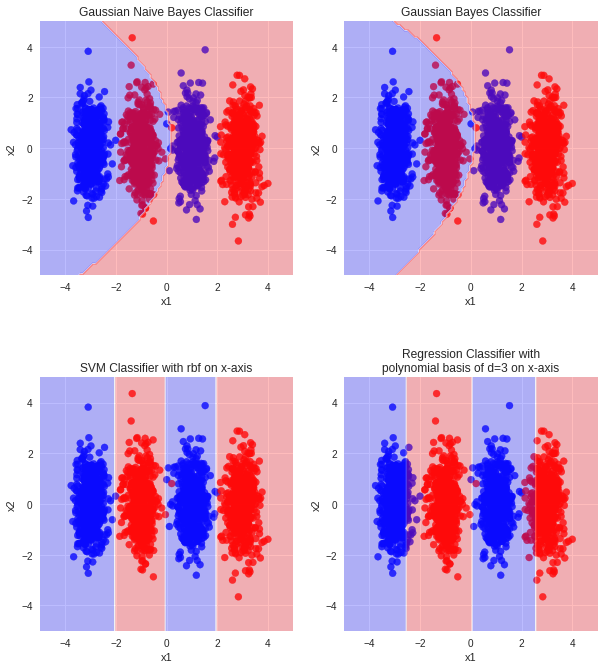

In [9]:
N = 500
ax_lim = (-5,5)

cov1 = [[.1,0],[0,1]]
X0 = np.concatenate((np.random.multivariate_normal((-3,0), cov1, N),np.random.multivariate_normal((1,0), cov1, N)))
cov2 = [[.1,0],[0,1]]
X1 = np.concatenate((np.random.multivariate_normal((-1,0), cov1, N),np.random.multivariate_normal((3,0), cov1, N)))

X = np.concatenate((X0,X1))
y = np.concatenate((np.zeros(len(X0)),np.ones(len(X1))))

# =============== X training ===============
plt.figure(figsize=(12,5))
plot_training_data(X, y, ax_lim)

# =============== Classifier ===============
plt.figure(figsize=(10,12))
# --------------- Gaussian Naive Bayes Classifier ---------------
model = GaussianNB()
model.fit(X, y)

plt.subplot(221)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Naive Bayes Classifier')

# --------------- Gaussian Bayes Classifier ---------------
model = BayesClassifier.from_samples(MultivariateGaussianDistribution, X, y)

plt.subplot(222)
plot_decision_boundary(X, y, lambda X: model.predict(X), ax_lim)
plt.title('Gaussian Bayes Classifier')

# =============== SVM Classifier of rbf on x-axis ===============
model = SVC(kernel='rbf')
model.fit(X[:,0].reshape(-1, 1), y)

plt.subplot(223)
plot_decision_boundary(X, y, lambda X: model.predict(X[:,0].reshape(-1, 1)), ax_lim)
plt.title('SVM Classifier with rbf on x-axis')

# =============== Regression Classifier with basis of polynomial d=3 on x-axis ===============
model = np.poly1d(np.polyfit(X[:,0], y, 3))

plt.subplot(224)
plot_decision_boundary(X, y, lambda X: model(X[:,0]) >= 0.5, ax_lim)
plt.title('Regression Classifier with\npolynomial basis of d=3 on x-axis')

plt.show()